In [1]:
import cairo
import pandas as pd

In [2]:
WIDTH, HEIGHT = 1000,300
MARGIN = 100
surface = cairo.SVGSurface('image.svg', WIDTH, HEIGHT)
ctx = cairo.Context(surface)
ctx.rectangle(0, 0, WIDTH, HEIGHT)
ctx.set_source_rgb(1, 1, 1)
ctx.fill()
track = 0

In [3]:

df = pd.read_csv('../plots/data.gff3', index_col=False, sep='\t', header=None, comment='#')
df.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
print(len(df.index))
df.head(2)

36


,seqname,source,feature,start,end,score,strand,frame,attribute
0,2D,IWGSC,gene,641599690,641606211,.,+,.,ID=gene:TraesCS2D02G578900;biotype=protein_cod...
1,2D,IWGSC,mRNA,641599690,641606211,.,+,.,ID=transcript:TraesCS2D02G578900.1;Parent=gene...


In [4]:
track += 1
ctx.move_to(MARGIN, track * 100)
ctx.line_to(WIDTH - MARGIN, track * 100)
ctx.set_source_rgb(0, 0, 0)
ctx.set_line_width(1)
ctx.stroke()

 = df.loc[df['feature'] == 'gene'].iloc[0]
start = gene['start']
end = gene['end']

utgener5 = df.loc[df['feature'] == 'five_prime_UTR'].iloc[0]
start5 = utr5['start']
end5 = utr5['end']

utr3 = df.loc[df['feature'] == 'three_prime_UTR'].iloc[0]
start3 = utr3['start']
end3 = utr3['end']

utr5_len = (end5 - start5) * (WIDTH - MARGIN) / (end - start)

ctx.rectangle(MARGIN, track * 90, utr5_len, 20)
ctx.set_source_rgb(0.8, 0.8, 1)
ctx.fill()


utr3_len = (end3 - start3) * (WIDTH - MARGIN) / (end - start)

ctx.rectangle(WIDTH - MARGIN - utr3_len, track * 90,utr3_len , 20)
ctx.set_source_rgb(0.8, 0.8, 1)
ctx.fill()


In [5]:
surface.write_to_png('image.png')

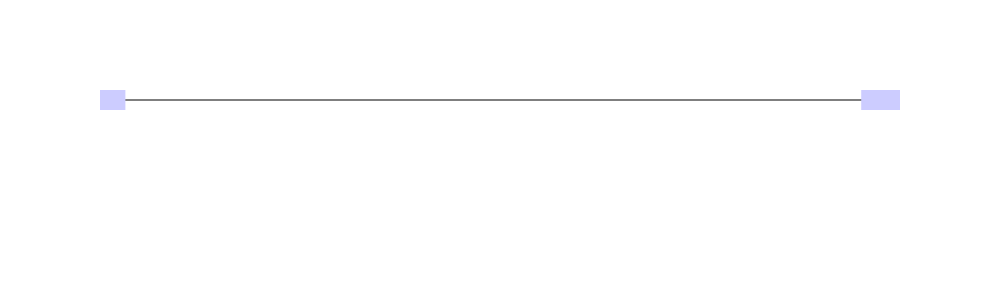

In [6]:
from IPython.display import Image
Image(filename='image.png') 
